In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [167]:
from lv.dnn.dnn_ALL import DNN_ALL

In [168]:
d = DNN_ALL(grid=1, top=150, pdx=[0,1,2], N_test=1000)

In [169]:
W, R0="RML", "B"

In [170]:
d.prepare(grid=1,isNoisy=1)

In [174]:
d.run(lr=0.01, dp=0.01, ep=1000)

Layers: [150, 64, 32, 16, 3]
| EP 1000 |loss: 0.0095 | mean_: 0.0095 | val_l: 0.0163 | val_m: 0.0163 | lr: 0.0100 | 
Layers: [150, 64, 32, 16, 3]
| EP 1000 |loss: 0.0106 | mean_: 0.0106 | val_l: 0.0163 | val_m: 0.0163 | lr: 0.0010 | 
Layers: [150, 64, 32, 16, 3]
| EP 1000 |loss: 0.0152 | mean_: 0.0152 | val_l: 0.0296 | val_m: 0.0296 | lr: 0.0100 | 
Layers: [150, 64, 32, 16, 3]
| EP 1000 |loss: 0.0093 | mean_: 0.0093 | val_l: 0.1189 | val_m: 0.1189 | lr: 0.0001 | 
Layers: [150, 64, 32, 16, 3]
| EP 1000 |loss: 0.0097 | mean_: 0.0097 | val_l: 0.0200 | val_m: 0.0200 | lr: 0.0100 | 
Layers: [150, 64, 32, 16, 3]
| EP 1000 |loss: 0.0115 | mean_: 0.0115 | val_l: 0.0505 | val_m: 0.0505 | lr: 0.0010 | 


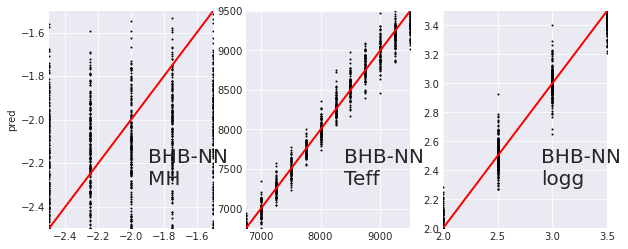

In [175]:
d.plot_pred(R0)

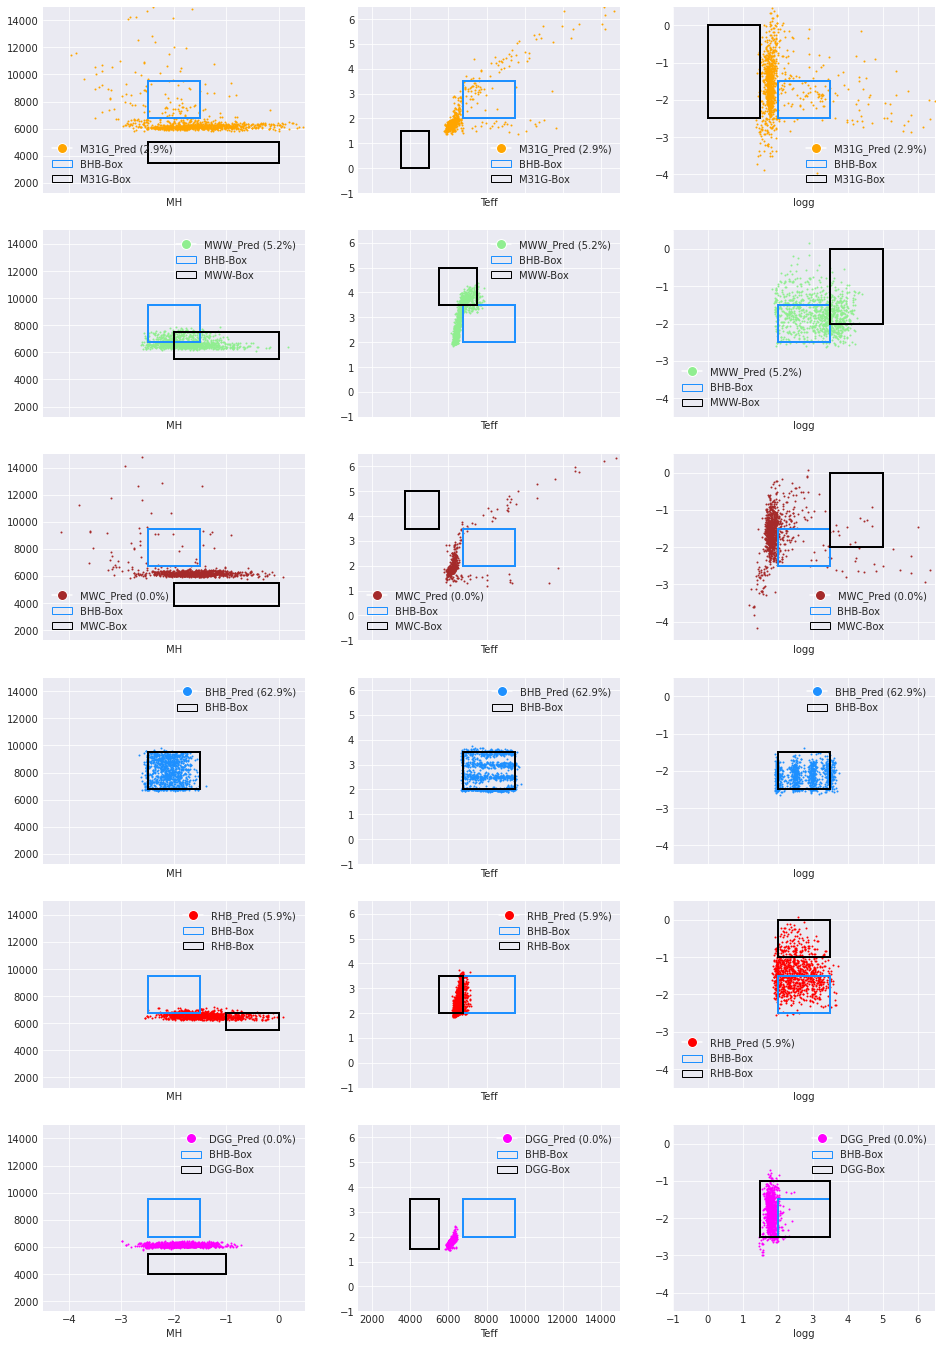

In [176]:
d.plot_pred_box_R0(R0, large=1)

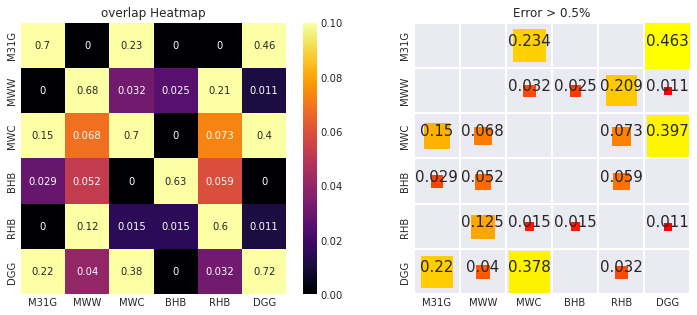

In [177]:
d.get_overlap_mat(plot=1)

In [ ]:
fn = self.scatter_fn(data, c=self.dRC[R1])

In [182]:
d.p_tests[R0]

array([[-2.25e+00,  8.50e+03,  2.00e+00],
       [-1.75e+00,  8.75e+03,  2.50e+00],
       [-2.00e+00,  9.25e+03,  2.50e+00],
       ...,
       [-2.00e+00,  8.50e+03,  2.50e+00],
       [-2.00e+00,  9.00e+03,  3.50e+00],
       [-2.00e+00,  7.75e+03,  2.50e+00]])

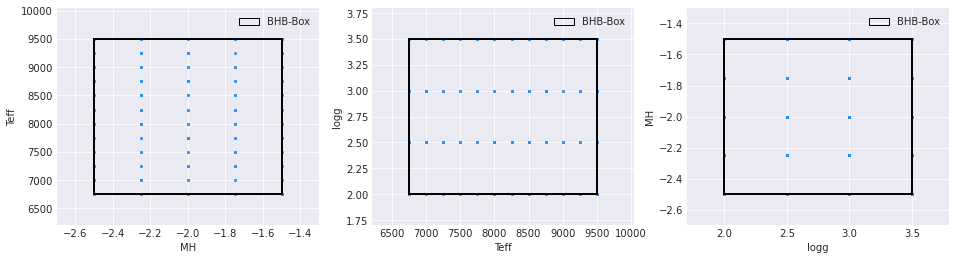

In [184]:
R0="B"
d.plot_box_R0_R1(R0,R0, data=d.p_tests[R0], n_box=0.2)

# SNR

In [188]:
R0="B"
dSN_preds_i, para  =d.predict_snr_flux_R0_i(0, R0=R0)


In [214]:
x0s,y0s,s05s,degree = d.get_ellipse_params(preds)

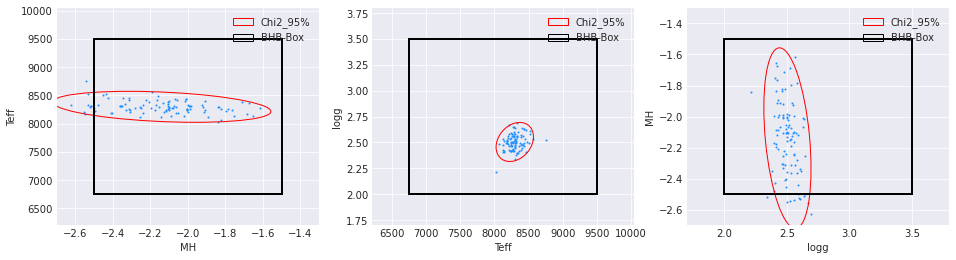

In [237]:
add_ellipse = d.get_ellipse_fn(preds)
d.plot_box_R0_R1(R0,R0, [add_ellipse], data=preds, n_box=0.2)

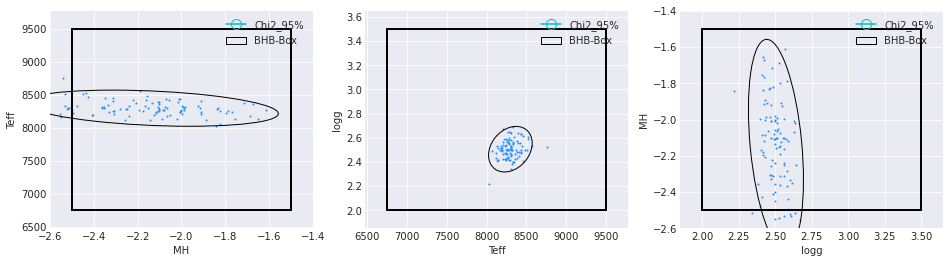

In [194]:
# preds

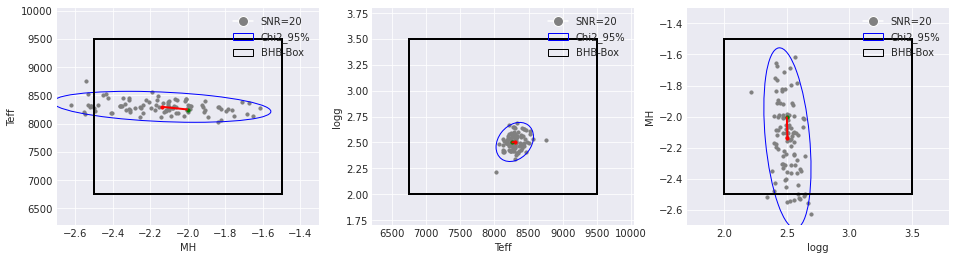

In [240]:
snr=20
preds = dSN_preds_i[snr]
fns = d.flow_fn_i(preds, para, snr=snr)
d.plot_box_R0_R1(R0,R0, fns, n_box=0.2)

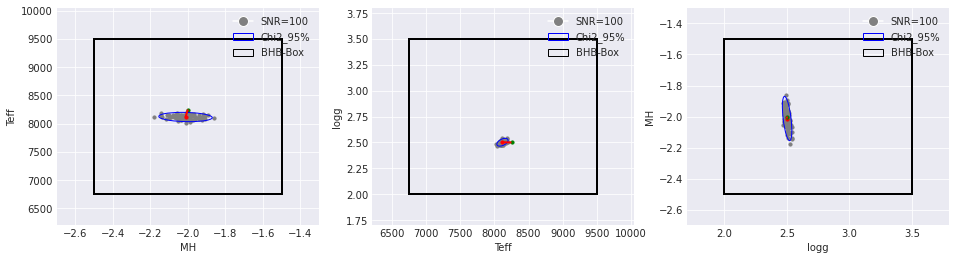

In [242]:
snr=100
preds = dSN_preds_i[snr]
fns = d.flow_fn_i(preds, para, snr=snr)
d.plot_box_R0_R1(R0,R0, fns, n_box=0.2)

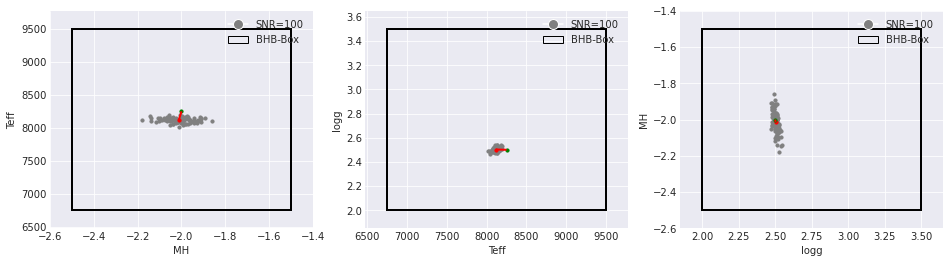

In [206]:
d.plot_box_R0_R1(R0,R0, fns, n_box=0.1)

In [163]:
preds.std(0)

array([3.66438461e-02, 2.73379080e+01, 1.42314653e-02])

In [149]:
preds.mean(0)

array([-2.24760820e+00,  8.23491469e+03,  2.51278808e+00])

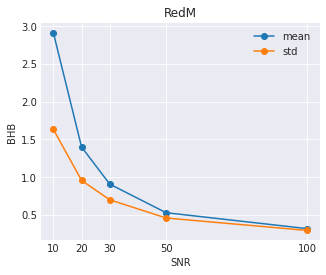

In [107]:
dStats = ddp.prepare_snr_flux(R0, plot=1)

In [339]:
preds, paras = ddp.test_snr_flux(R0,nFlux=9)

In [340]:
N, npdx=9, 3
snr100=np.zeros((N, npdx))
for i in range(N):
    snr100[i] = preds[i][100].mean(0)
    snr100[i] = preds[i][100].mean(0)


In [381]:
pred0 = preds[0][100]

In [765]:
from lv.util import Util


In [771]:
ddp.Util=Util()

In [898]:
data =ddp.Util.get_correlated_dataset(cov=[[1,0,10],[2,1,0],[0,0,1]], mu=(0,0,0),scale=(10,5,1))

In [899]:
data.shape

(1000, 3)

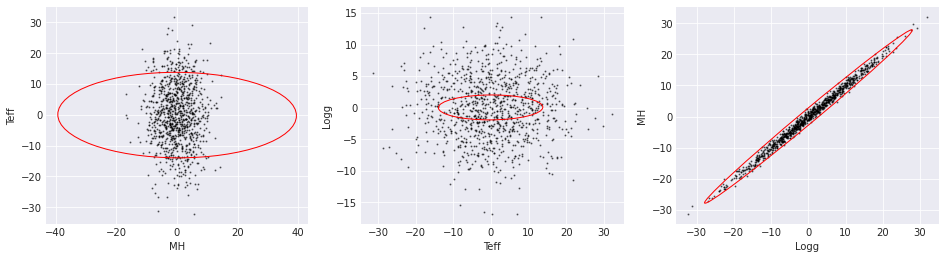

In [908]:
add_ellipse_ij = get_ellipse_ij_fn(data, ratio=0.95)
ddp.Util.plot3(fns=[add_ellipse_ij], data=data)

In [901]:
    _, s, v = np.linalg.svd(np.cov(data.T))


In [902]:
s

array([198.58920267,  24.64479525,   0.49900163])

In [903]:
v

array([[-7.06069243e-01,  3.78654171e-03, -7.08132676e-01],
       [-2.11997582e-03, -9.99992525e-01, -3.23338233e-03],
       [-7.08139626e-01, -7.81767659e-04,  7.06071992e-01]])

In [907]:
def get_ellipse_ij_fn(pred0, ratio=0.95, scaler=[1,1,1]):
    pred = pred0 / scaler
    _, s, v = np.linalg.svd(np.cov(pred.T))
    mu, sigma = pred.mean(0), pred.std(0)
    df=pred.shape[1]
    chi2_val = chi2.ppf(ratio, df)
    co = 2 * chi2_val**0.5
    s05=s**0.5
    def add_ellipse_ij(i,j,ax, handles=None):
        x0,y0 = mu[i], mu[j]
        k=0 if j==2 else j+1
        degree = get_angle_from_v(v,i,j,k)
#         x_sc = 1 / (s[i]+s[j])**0.5
        x_sc=1
        e = Ellipse(xy=(0,0),width=co*s05[i]*x_sc, height=co*s05[j]*x_sc, facecolor="none",edgecolor=c,label=f"Chi2_{100*ratio:.0f}%")
        transf = transforms.Affine2D().rotate_deg(degree).translate(x0,y0).scale(scaler[i],scaler[j]) + ax.transData        
        e.set_transform(transf)
        ax.add_patch(e)
        return handles
    return add_ellipse_ij

In [872]:
i,j=0,1
_, s, v = np.linalg.svd(np.cov(data.T))
s05=s**0.5

In [871]:
s

array([106.31538671,  26.04642887,   1.01568359])

In [906]:
def get_angle_from_v(v, i,j, k):
    radian =np.arctan(v[i][j] / v[i][i])
    degree = radian / np.pi * 180    
    return degree

In [ ]:
df=3
chi2_val = chi2.ppf(ratio, df)


In [856]:
def get_ellipse_ij_fn(pred0, ratio=0.95):
    pred = np.copy(pred0)
    pred[:,1] /=1000
    scales = [1,1000,1]
    _, s, v = np.linalg.svd(np.cov(pred.T))
    mu, sigma = pred.mean(0), pred.std(0)
    df=pred.shape[1]
    chi2_val = chi2.ppf(ratio, df)
    co = 2 * chi2_val**0.5
    s05=s**0.5
    def add_ellipse_ij(i,j,ax, handles=None):
        x0,y0 = mu[i], mu[j]
        degree = get_angle_from_v(v,idx=0)
#         x_sc = 1 / (s[i]+s[j])**0.5
        x_sc=1
        e = Ellipse(xy=(0,0),width=co*s05[i]*x_sc, height=co*s05[j]*x_sc, facecolor="none",edgecolor=c,label=f"Chi2_{100*ratio:.0f}%")
        transf = transforms.Affine2D().rotate_deg(degree).translate(x0,y0).scale(scales[i],scales[j]) + ax.transData        
        e.set_transform(transf)
        ax.add_patch(e)
        return handles
    return add_ellipse_ij

In [857]:
add_ellipse_ij = get_ellipse_ij_fn(pred0, ratio=0.95)

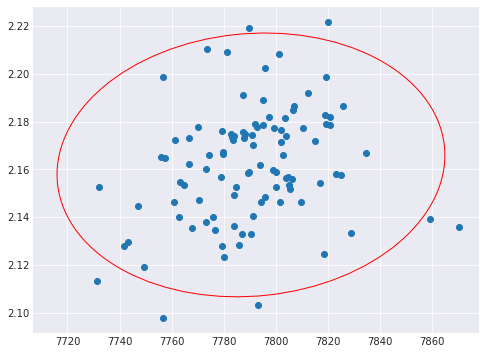

In [860]:
ax= plt.subplots(1, figsize=(8,6), facecolor="w")[1]
i,j=1,2
ax.scatter(pred0[:,i], pred0[:,j])
# ax.scatter(mu[i], mu[j])
add_ellipse_ij(i,j,ax)

In [783]:
_, s, v = np.linalg.svd(np.cov(x,y))


In [784]:
s

array([5.90945852e+02, 4.70540231e-03])

In [790]:
ddp.Util.get_angle_from_v(v,idx=0)

89.9461749097406

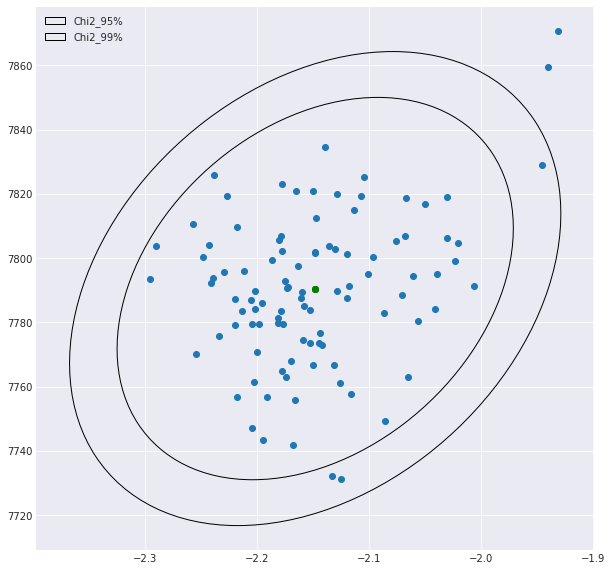

In [789]:
ddp.Util.plot_correlated(x,y,chis=[0.95,0.99])

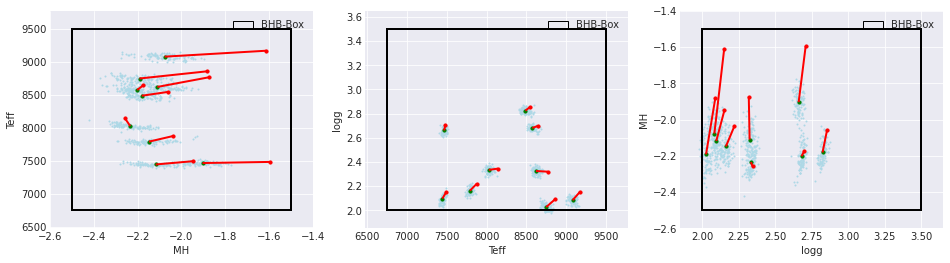

In [371]:
axs = plt.subplots(1, 3,  figsize=(16, 4), facecolor="w")[1]
# fn=ddp.plot_pred_fn_R0_R1(R0,R0)
fns = ddp.SN_pred_fn(preds, c="lightblue")
fns1 = ddp.flow_fn(paras, snr100) 
ddp.plot_box_R0_R1(R0,R0,fns+fns1, axs=axs, n_box=0.1)   


# for i in range(9):
#     data = snr100[i]
#     mean = np.array([data.mean(0)])
#     para0 = np.array([paras[i, :3]])
# #     ddp.plot_box_R0_R1(R0,R0,data=data, axs=axs, n_box=0.3, color='gray')    
#     ddp.plot_box_R0_R1(R0,R0,data=mean, axs=axs, n_box=0.1, color="b")   


#     for ii, ax in enumerate(axs):
#         jj=0 if ii ==2 else ii+1
#         axs[ii].plot([mean[0][ii], para0[0,ii]], [mean[0][jj], para0[0,jj]], 'r', alpha=0.3)



In [375]:
fmean=ddp.para_fn(snr100, c="g",s=10)
center=snr100

In [ ]:
x, y = get_correlated_dataset(800, dependency, mu, scale)

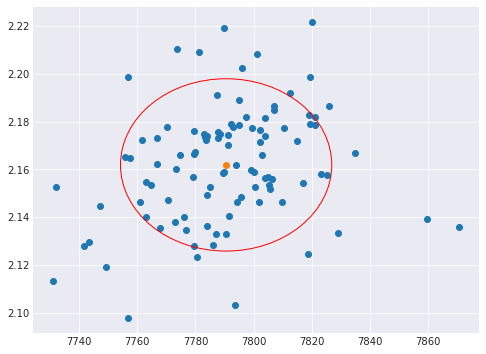

In [425]:
ax= plt.subplots(1, figsize=(8,6), facecolor="w")[1]
i,j=1,2
ax.scatter(pred0[:,i], pred0[:,j])
ax.scatter(mu[i], mu[j])
e = Ellipse(xy=(mu[i], mu[j]), width=3*sigma[i],height=3*sigma[j], facecolor="none",edgecolor="r")
ax.add_patch(e)


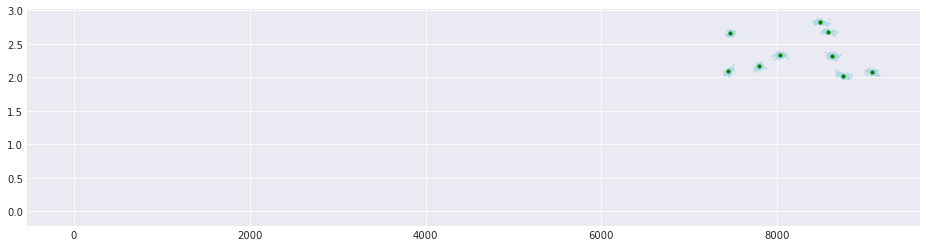

In [423]:
ax= plt.subplots(1, figsize=(16, 4), facecolor="w")[1]
fnsList = fns + [fmean]
n=0
i,j=1,2
for fn in fnsList:
    fn(i,j, ax=ax)
#     e = Ellipse(xy=(center[n][i], center[n][j]), width=sigma[i],height=sigma[j])
#     ax.add_patch(e)
    confidence_ellipse(pred0c[:,i], pred0c[:,j], ax=ax)    

In [46]:
ddp.run(lr=0.03, dp=0.1, ep=2000)

Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0536 | mean_: 0.0536 | val_l: 0.0186 | val_m: 0.0186 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0502 | mean_: 0.0502 | val_l: 0.0145 | val_m: 0.0145 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0506 | mean_: 0.0506 | val_l: 0.0161 | val_m: 0.0161 | lr: 0.0030 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0581 | mean_: 0.0581 | val_l: 0.0269 | val_m: 0.0269 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0452 | mean_: 0.0452 | val_l: 0.0121 | val_m: 0.0121 | lr: 0.0300 | 
Layers: [100, 64, 32, 16, 3]
| EP 2000 |loss: 0.0562 | mean_: 0.0562 | val_l: 0.0227 | val_m: 0.0227 | lr: 0.0300 | 


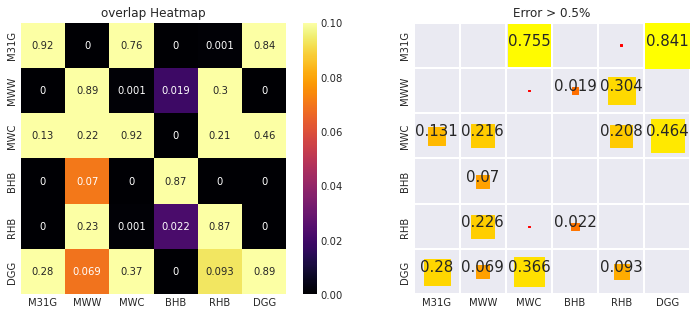

In [67]:
ddp.get_overlap_mat(plot=1)

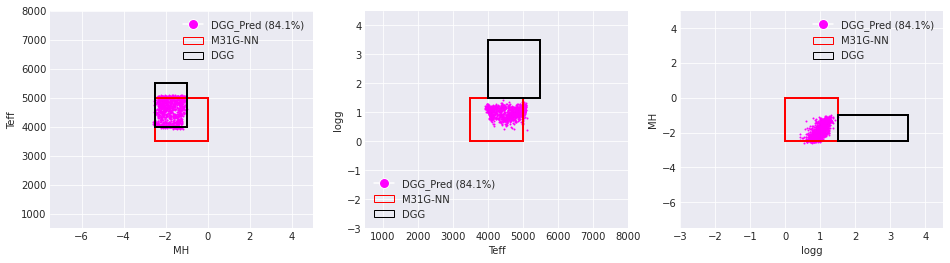

In [49]:
ddp.plot_box_R0_R1("M","G")

In [ ]:
ddp.

In [148]:
SN=10
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [149]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [150]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

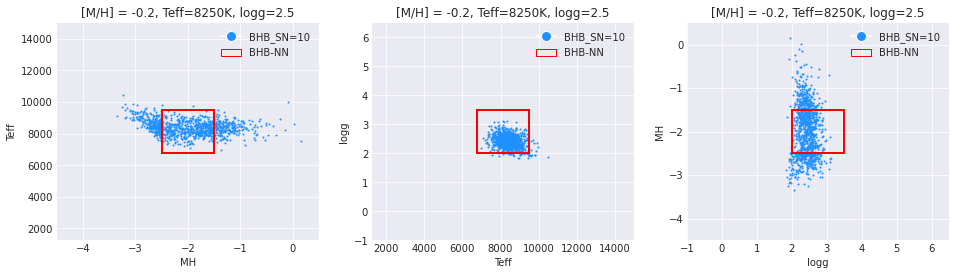

In [151]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

In [129]:
SN=100
PATH = f"/scratch/ceph/swei20/data/dnn/BHB/snr{SN}_1k.h5"
with h5py.File(PATH, "r") as f:
    nsflux = f["nsflux_R"][()]
    flux = f["flux_R"][()]

In [130]:
p_pred = ddp.predict_nsflux({"RML":nsflux}, "B", dnn=dnn)

In [131]:
p_pred

array([[-2.03895438e+00,  8.28323795e+03,  2.40518598e+00],
       [-1.96781856e+00,  8.23582782e+03,  2.49382615e+00],
       [-1.82410669e+00,  8.30950710e+03,  2.47091401e+00],
       ...,
       [-1.97906435e+00,  8.20973553e+03,  2.46400557e+00],
       [-2.01124737e+00,  8.18802921e+03,  2.47664459e+00],
       [-1.78430700e+00,  8.21739812e+03,  2.44394636e+00]])

In [132]:
ddp.ns_preds={"B": {}}
ddp.ns_preds["B"] = {"B": p_pred}

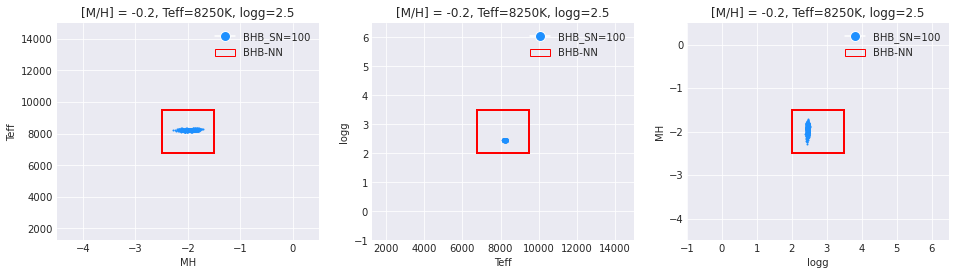

In [133]:

ddp.plot_nsbox_R0_R1("B", "B", SN, Ps=[-0.2, 8250, 2.5])

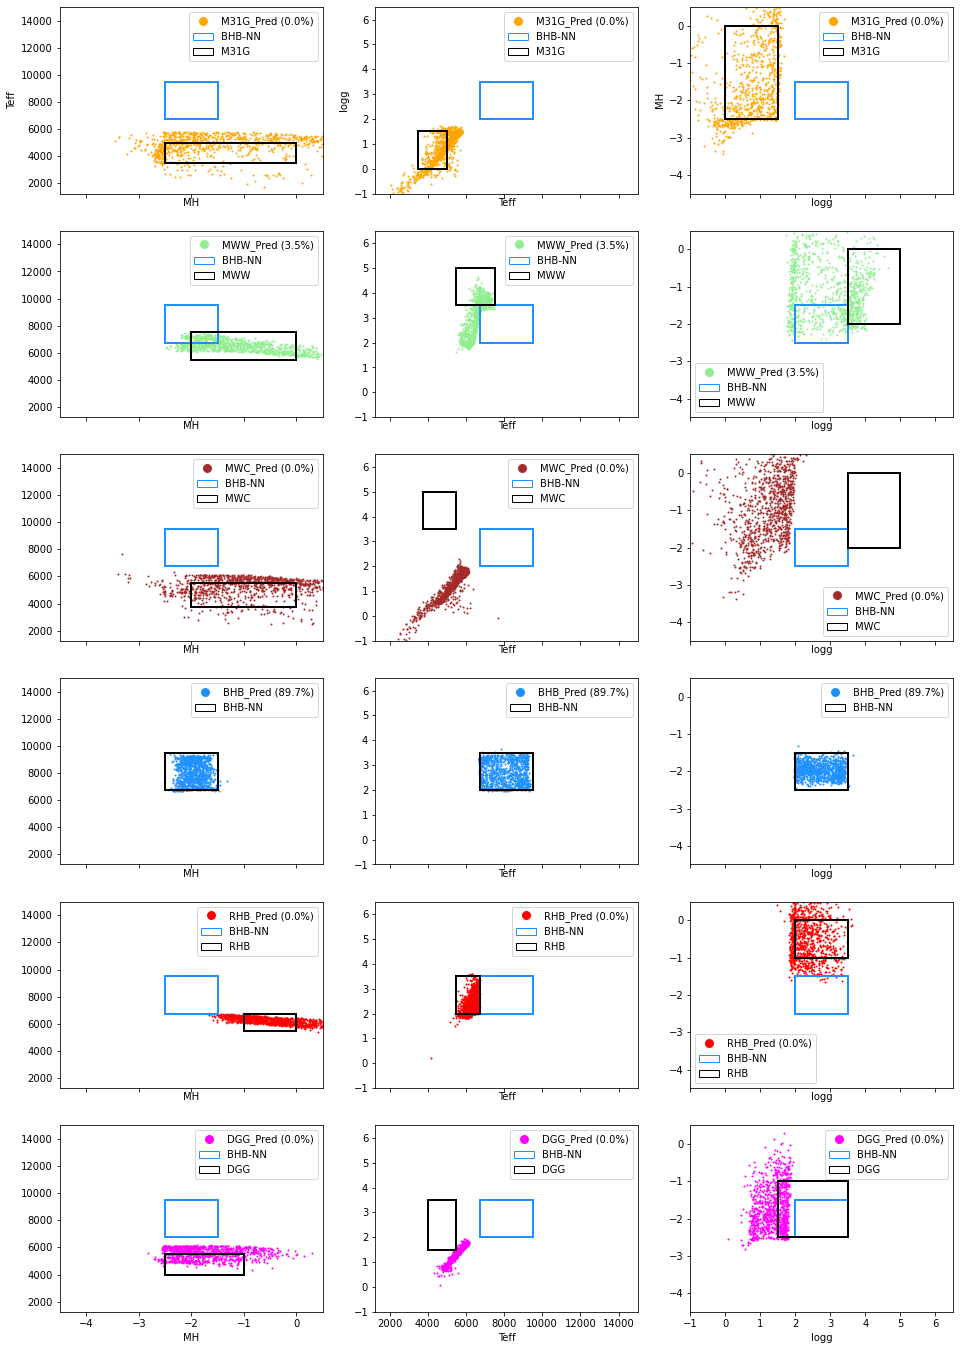

In [49]:
ddp.plot_box_R0("B", large=1)

In [72]:
wave, flux, err, pval, snr = ddp.load_RBF_W_R("RML", "B", 1000)

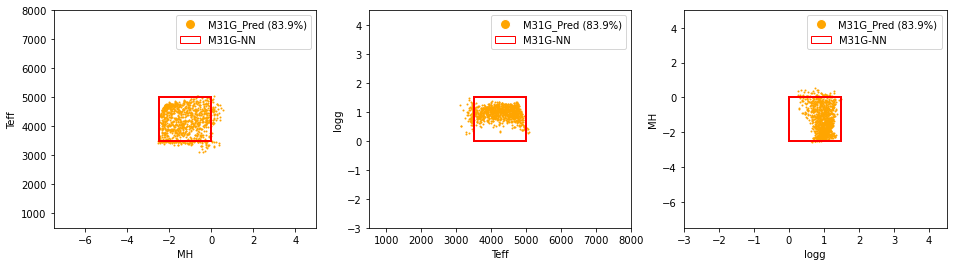

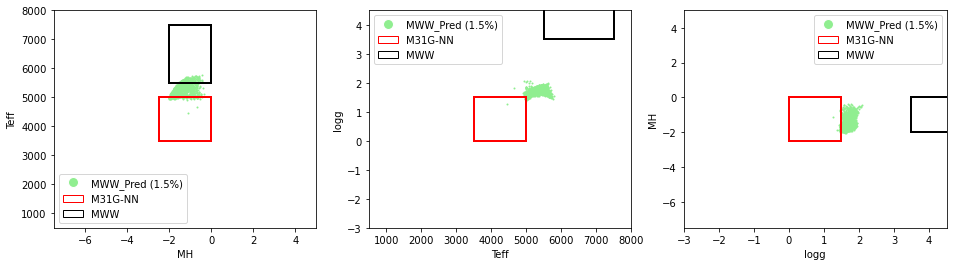

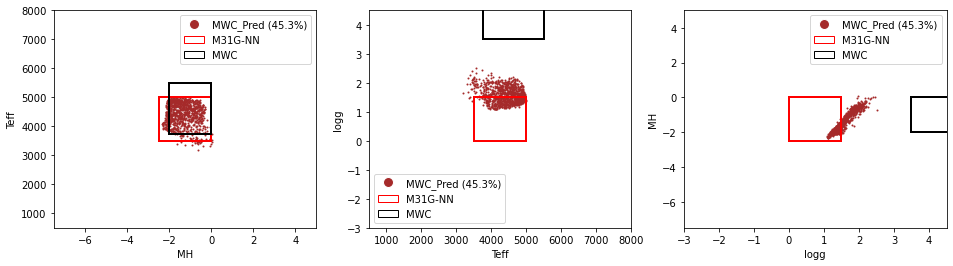

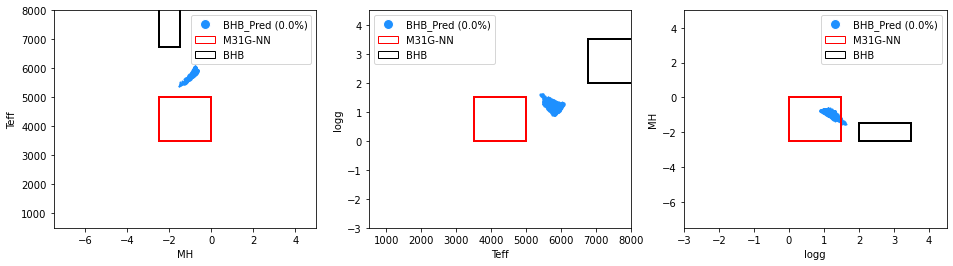

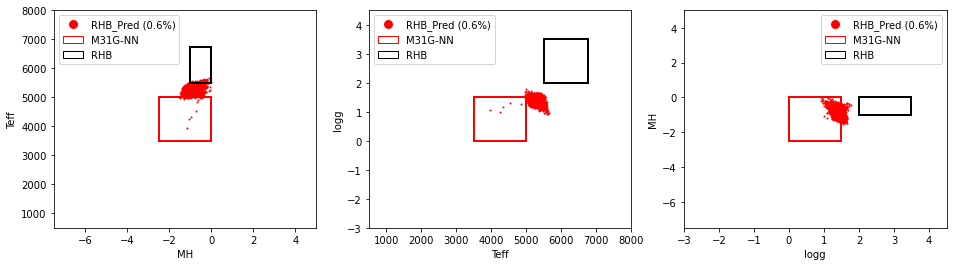

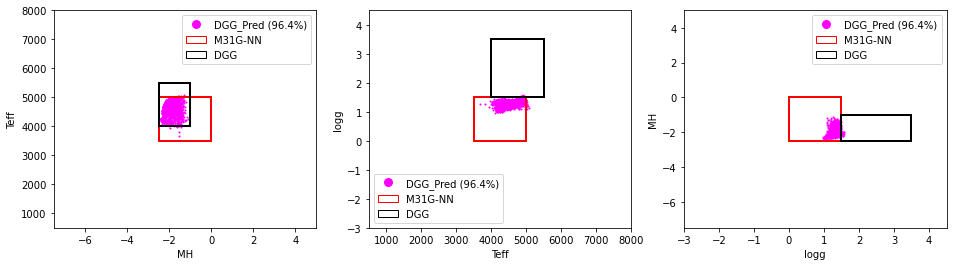

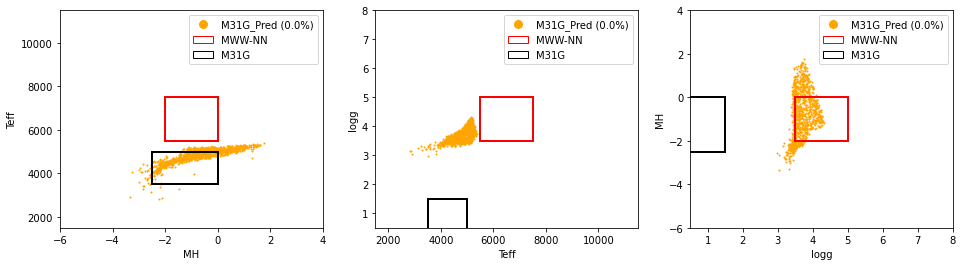

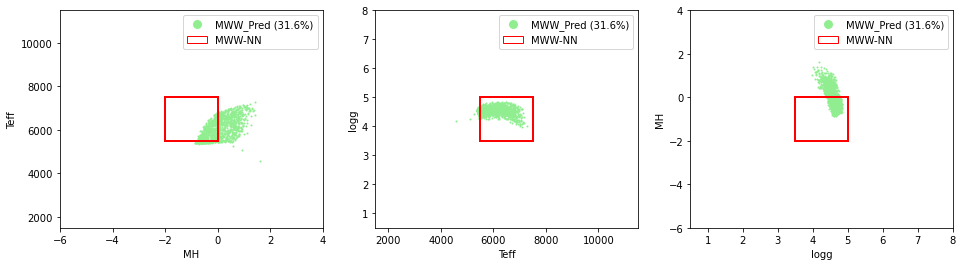

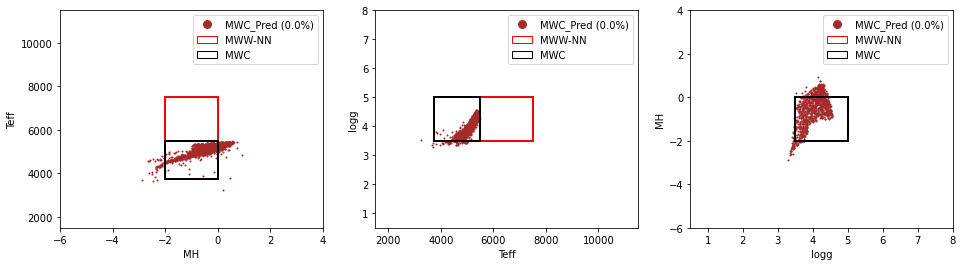

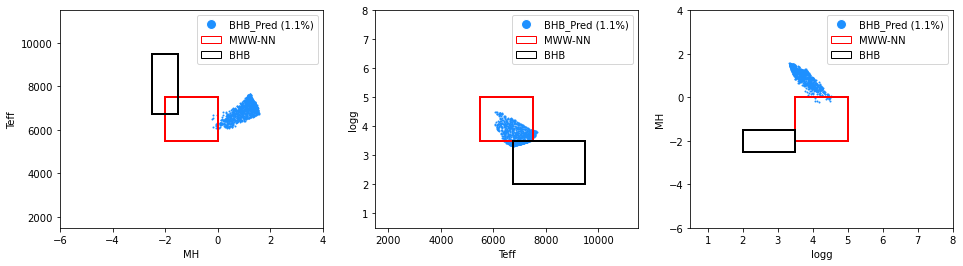

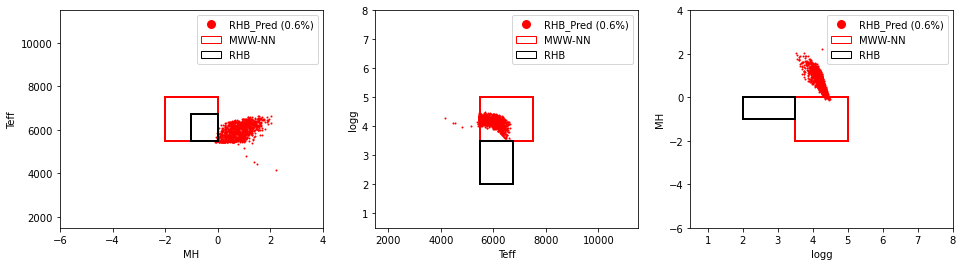

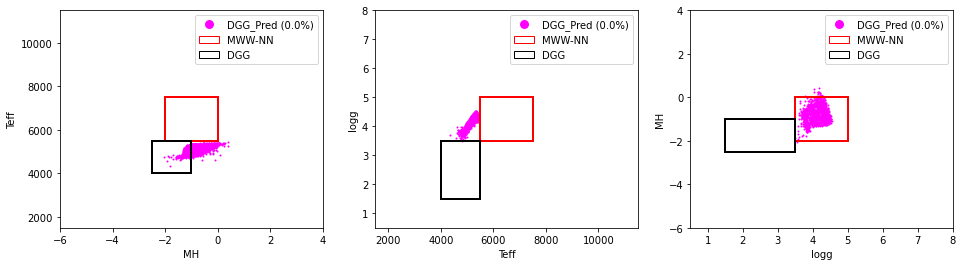

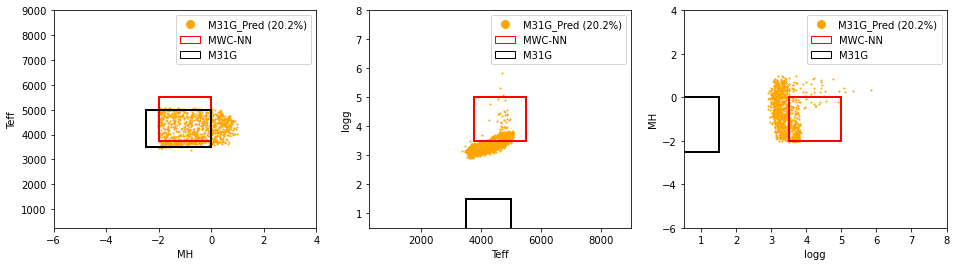

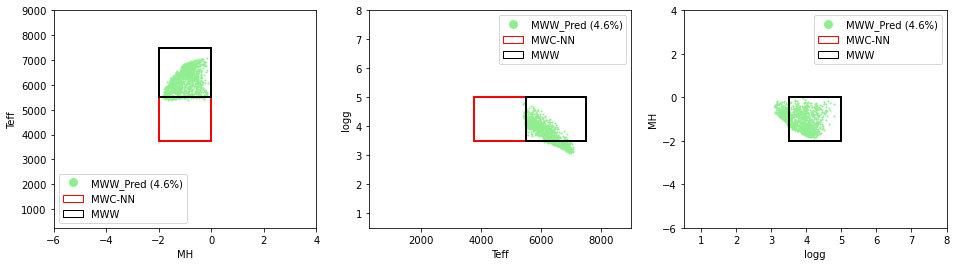

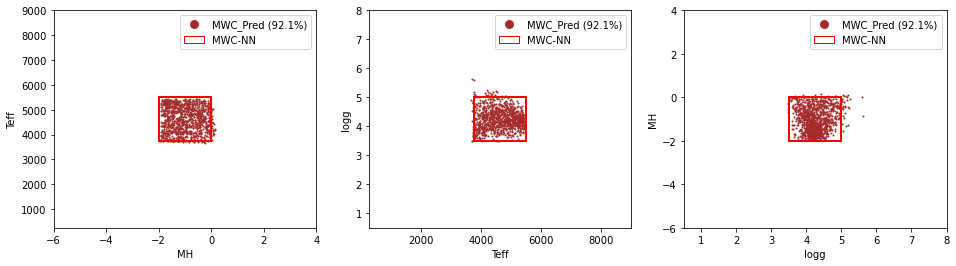

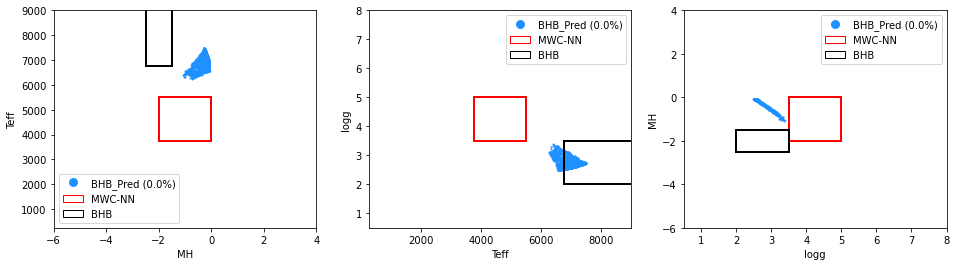

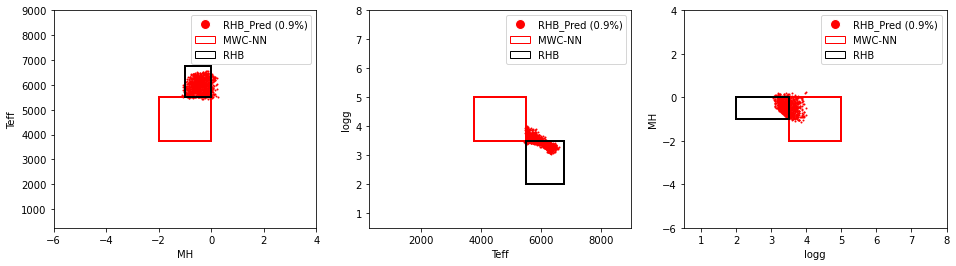

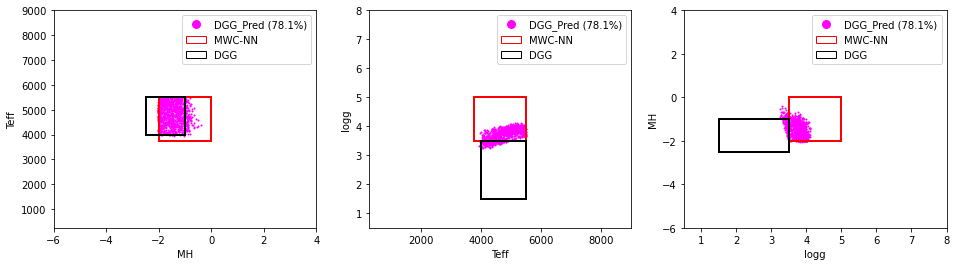

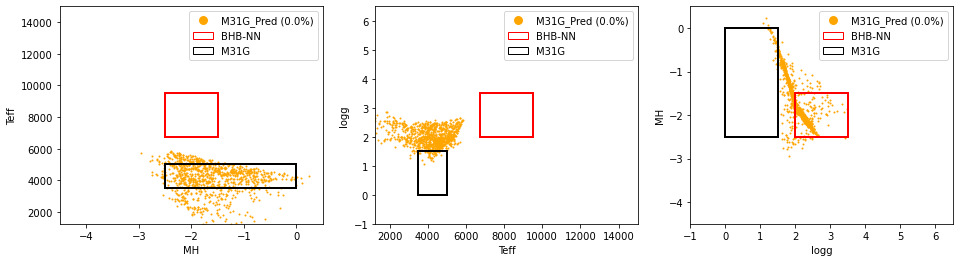

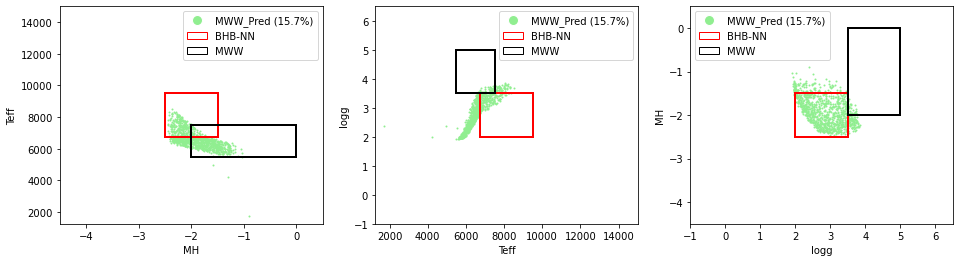

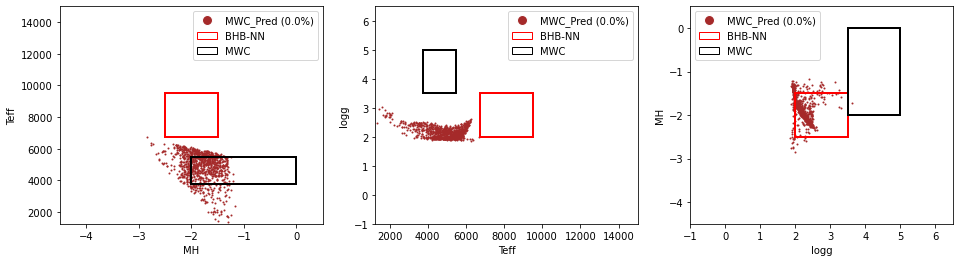

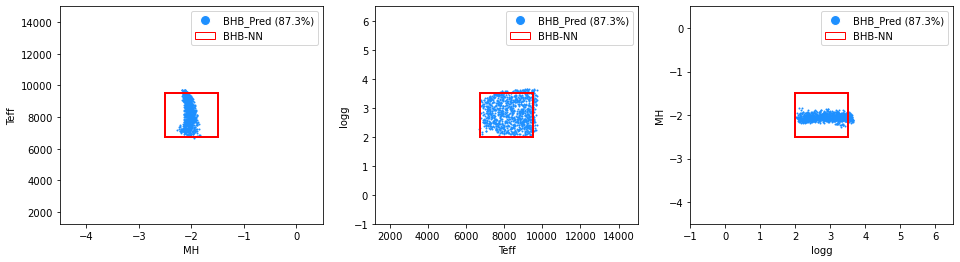

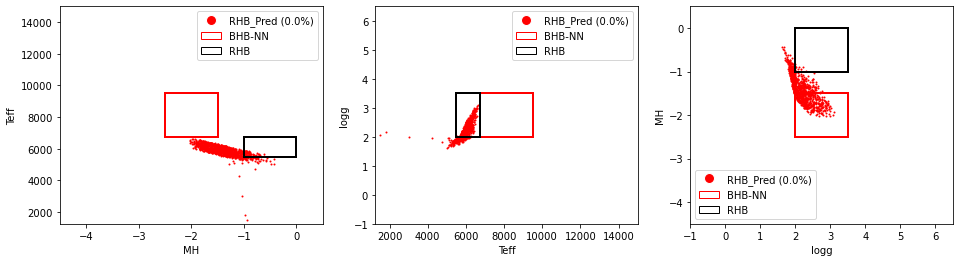

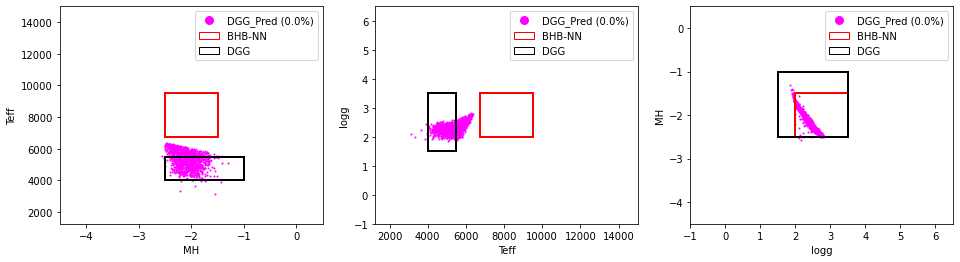

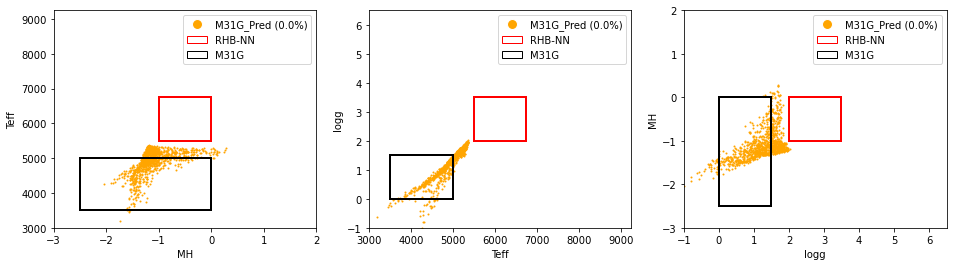

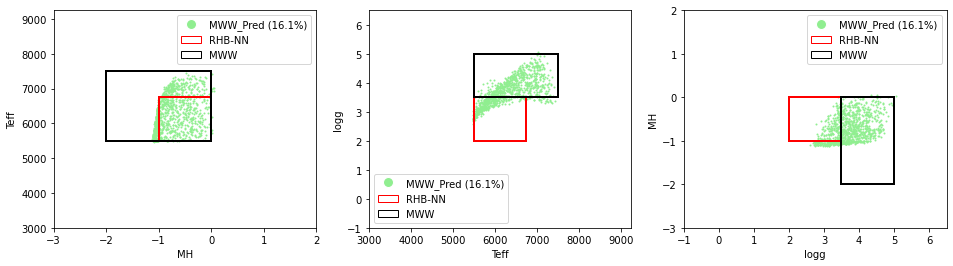

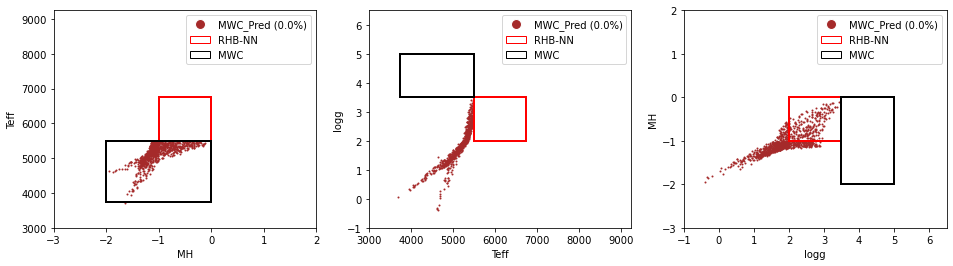

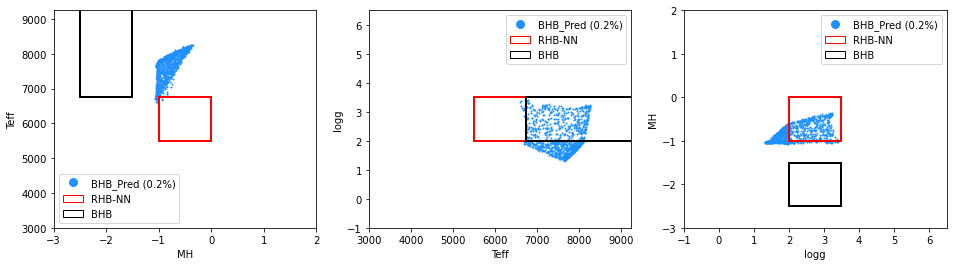

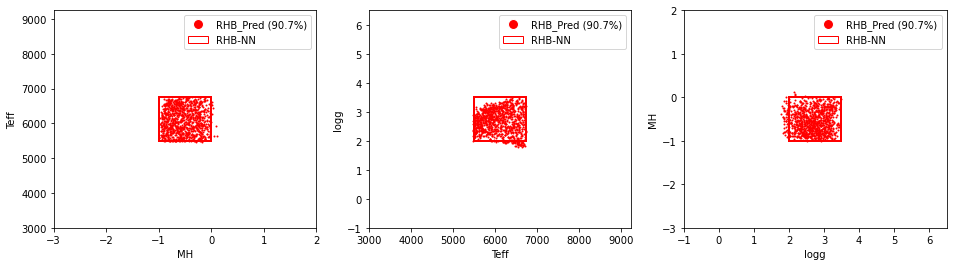

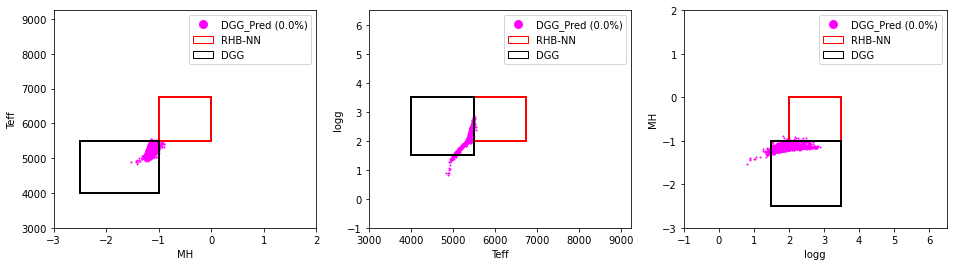

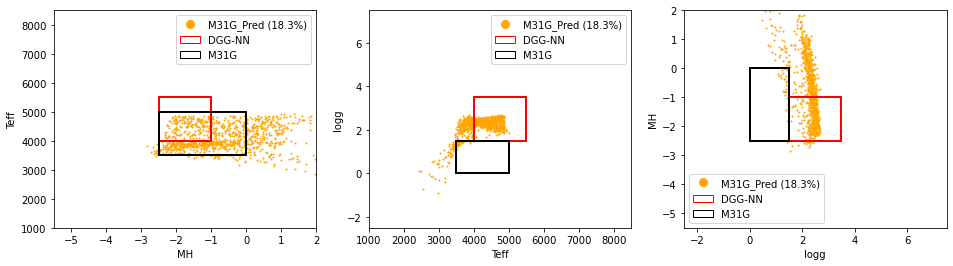

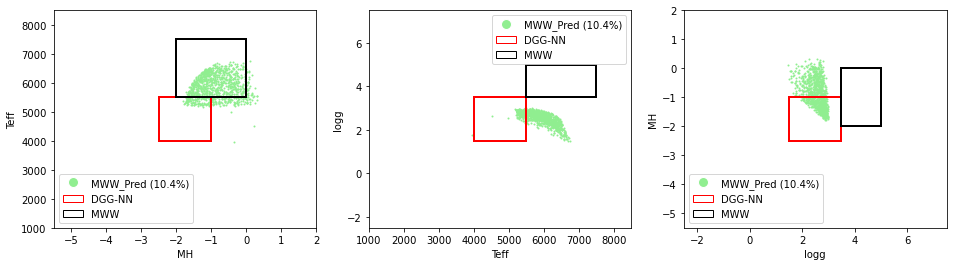

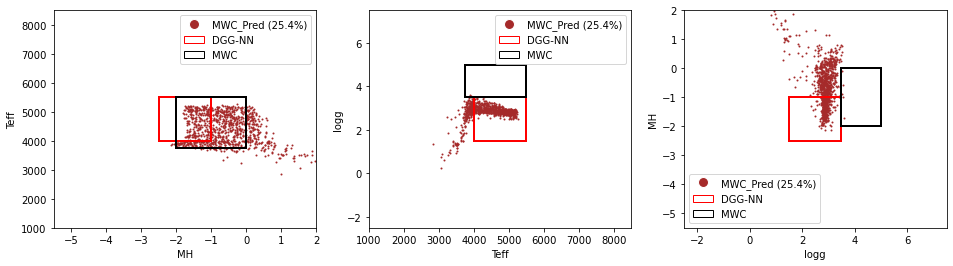

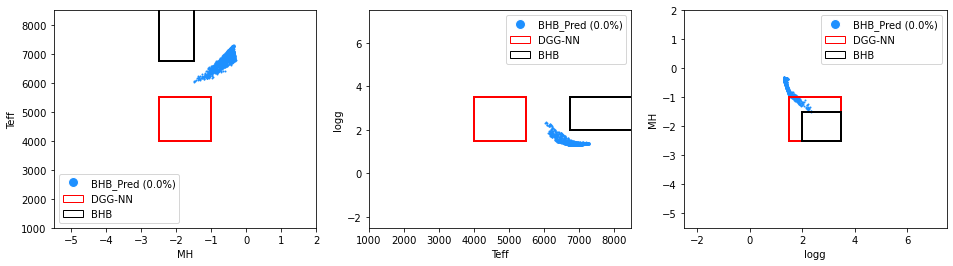

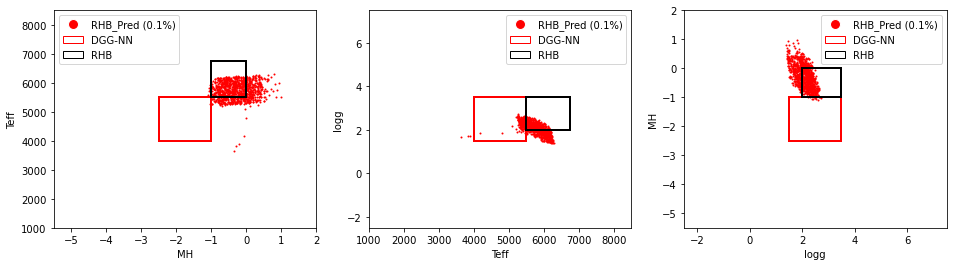

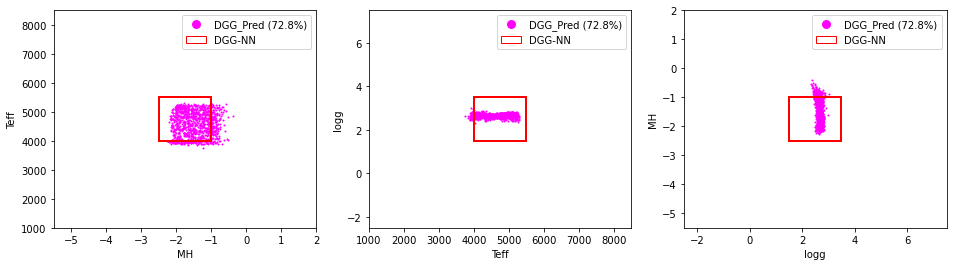

In [77]:
for R0 in ddp.Rnms:
    for R1 in ddp.Rnms:
        ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None) 

In [104]:
np.min(snr)

27.66242671841118

In [109]:
np.argmin(abs(snr - 30))

95

In [133]:
def plot_SN(SNval=30, W="RML", R="B", rate=1):
    nsdx = np.argmin(abs(snr - SNval))
    Ps = pval[nsdx]
    nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)
    p_pred = ddp.trans_predict(nsfluxs, W, R)
    ddp.ns_preds={R: {}}
    ddp.ns_preds[R] = {R: p_pred}
    if rate == 1: 
        SN = snr[nsdx]
    else:
        SN = ddp.get_snr(nsfluxs)
    ddp.plot_box_R0_R1(R, R, SN=np.around(SN), Ps=Ps, n_box=0.5)

In [130]:
SNval=30
rate=2
nsdx = np.argmin(abs(snr - SNval))
Ps = pval[nsdx]
nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)


In [ ]:
err

In [127]:
ddp.get_snr(nsfluxs[0])

not list


62.69041541856068

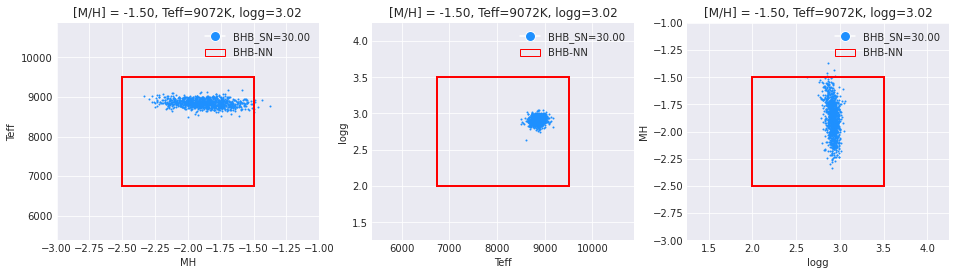

In [134]:
plot_SN(rate=1.)

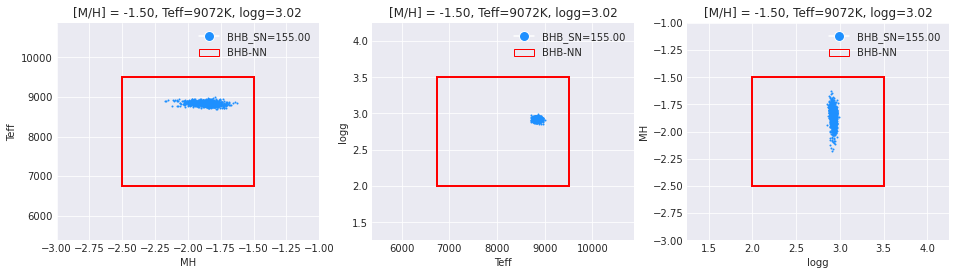

In [136]:
plot_SN(rate=0.5)

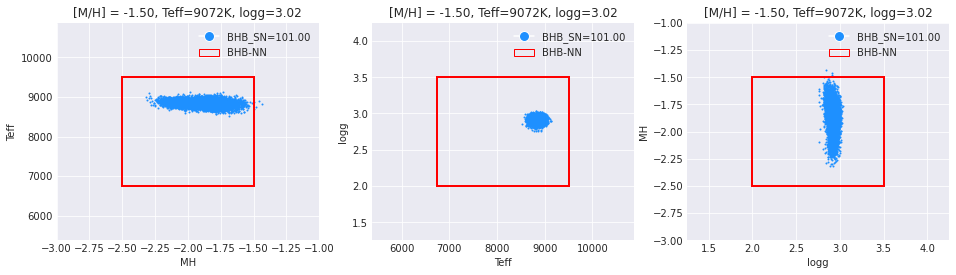

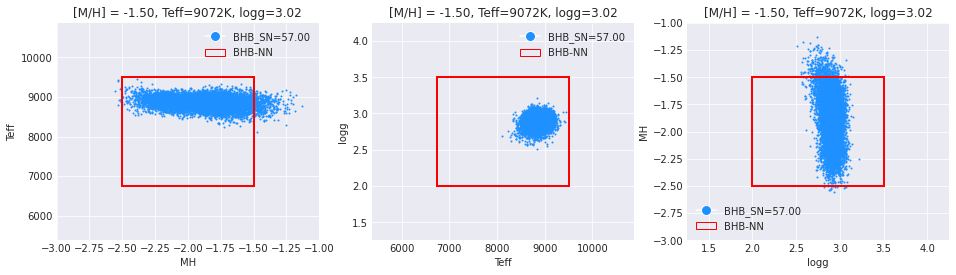

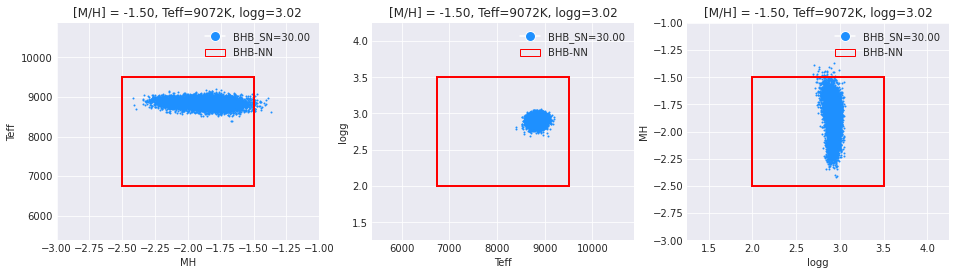

In [118]:
for r in [ 0.8,1.5, 1]:
    plot_SN(rate=r) 

generate noise model for new box

dose snr work for R5000

take 1 model from region and add noise
error projection. snr = 10 * sqrt(2), Bosz_R5000, 30, 60

In [ ]:
sqrt(20)

snr at original /observed spec.

In [51]:
ddp.get_overlap_mat()

KeyError: 'M'

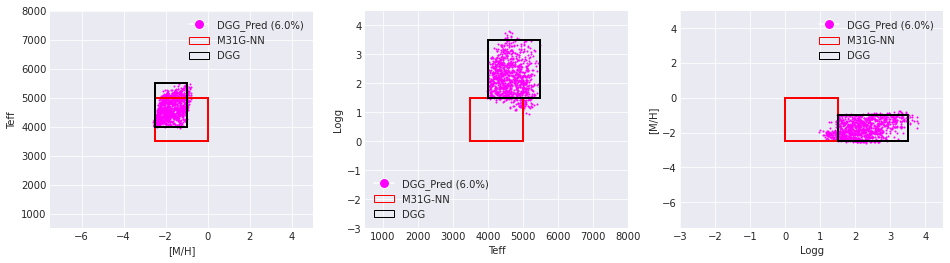

In [242]:
R0, R1 = "M", "G"
ddp.plot_box_R0_R1(R0, R1, n_box=2, axs=None)